In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import h5py
import string

%matplotlib inline

In [2]:
h5f = h5py.File('kernels/Q_hourly_kernels_3D_0p25deg_Grayver2017_WOA.h5', 'r')
Qq = h5f['Qq_time'][:2]
Qs = h5f['Qs_time'][:2]
times = h5f['times'][()]
h5f.close()

In [5]:
kmax = 90
cos_indices = dict()
sin_indices = dict()
idx = 0
for k in range(1, kmax+1):
    for l in range(k + 1):
        cos_indices[(k, l)] = idx
        idx += 1
        
        if l > 0:
            sin_indices[(k, l)] = idx
            idx += 1

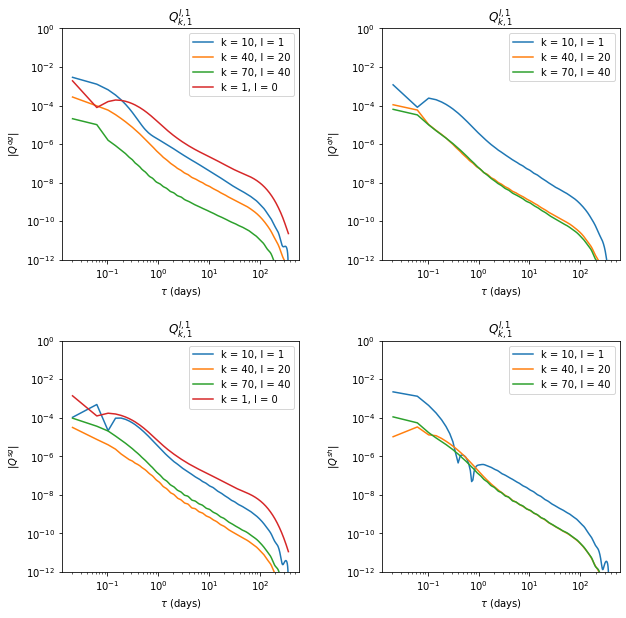

In [48]:
nm_idx = 1

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, cos_indices[(10, 1)]]),label='k = 10, l = 1')
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, cos_indices[(40, 20)]]),label='k = 40, l = 20')
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, cos_indices[(70, 40)]]),label='k = 70, l = 40')
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, cos_indices[(1, 0)]]),label='k = 1, l = 0')
ax1.legend()
ax1.set_title(r'$Q_{k,1}^{l,1}$')
ax1.set_ylim([1e-12, 1])
ax1.set_xlabel(r'$\tau$ (days)')
ax1.set_ylabel(r'$|Q^{qg}|$')

ax1 = fig.add_subplot(2,2,2)
#ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, sin_indices[(1, 0)]]),label='k = 1, l = 0')
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, sin_indices[(10, 1)]]),label='k = 10, l = 1')
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, sin_indices[(40, 20)]]),label='k = 40, l = 20')
ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, sin_indices[(70, 40)]]),label='k = 70, l = 40')
ax1.legend()
ax1.set_ylim([1e-12, 1])
ax1.set_title(r'$Q_{k,1}^{l,1}$')
ax1.set_xlabel(r'$\tau$ (days)')
ax1.set_ylabel(r'$|Q^{qh}|$')

ax1 = fig.add_subplot(2,2,3)
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, cos_indices[(10, 1)]]),label='k = 10, l = 1')
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, cos_indices[(40, 20)]]),label='k = 40, l = 20')
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, cos_indices[(70, 40)]]),label='k = 70, l = 40')
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, cos_indices[(1, 0)]]),label='k = 1, l = 0')
ax1.legend()
ax1.set_title(r'$Q_{k,1}^{l,1}$')
ax1.set_ylim([1e-12, 1])
ax1.set_xlabel(r'$\tau$ (days)')
ax1.set_ylabel(r'$|Q^{sg}|$')

ax1 = fig.add_subplot(2,2,4)
#ax1.loglog(times / (24*3600), np.abs(Qq[nm_idx, sin_indices[(1, 0)]]),label='k = 1, l = 0')
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, sin_indices[(10, 1)]]),label='k = 10, l = 1')
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, sin_indices[(40, 20)]]),label='k = 40, l = 20')
ax1.loglog(times / (24*3600), np.abs(Qs[nm_idx, sin_indices[(70, 40)]]),label='k = 70, l = 40')
ax1.legend()
ax1.set_ylim([1e-12, 1])
ax1.set_title(r'$Q_{k,1}^{l,1}$')
ax1.set_xlabel(r'$\tau$ (days)')
ax1.set_ylabel(r'$|Q^{sh}|$')

plt.subplots_adjust(wspace=0.35, hspace = 0.35)
plt.show()